In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from scipy.stats import skew

In [2]:
application_file = r'data/application_record.csv'
credit_file = r'data/credit_record.csv'

In [3]:
df_application = pd.read_csv(application_file)
df_credit = pd.read_csv(credit_file)
print(df_application.shape)
print(df_credit.shape)

(438557, 18)
(1048575, 3)


In [4]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### 1.Removing duplicates

In [6]:
df_application = df_application.drop_duplicates()
df_credit = df_credit.drop_duplicates()
df_application.reset_index(inplace=True)
df_application.drop(columns=['index'],inplace=True)
df_credit.reset_index(inplace=True)
df_credit.drop(columns=['index'],inplace=True)

### 2.Adding new columns

In [7]:
df_application['AGE'] = (df_application['DAYS_BIRTH'] / -365.25).astype(int)

In [8]:
df_application['AGE'].describe()

count    438557.000000
mean         43.295569
std          11.459525
min          20.000000
25%          34.000000
50%          42.000000
75%          53.000000
max          68.000000
Name: AGE, dtype: float64

In [9]:
df_application.query('DAYS_EMPLOYED==365243')['OCCUPATION_TYPE'].drop_duplicates()

7    NaN
Name: OCCUPATION_TYPE, dtype: object

### 3.Filtering out rows based on value

In [10]:
df_application['DAYS_EMPLOYED'] = df_application['DAYS_EMPLOYED'].where(df_application['DAYS_EMPLOYED']!=365243,0)

In [11]:
df_application['DAYS_EMPLOYED'].sort_values()

102186   -17531
102185   -17531
102187   -17531
102188   -17531
102189   -17531
          ...  
174975        0
174974        0
174973        0
156723        0
268401        0
Name: DAYS_EMPLOYED, Length: 438557, dtype: int64

In [12]:
df_application['TOTAL_EXPERIENCE'] = (df_application['DAYS_EMPLOYED'] / -365.25).astype(int)

### 4.Filling in missing values

In [13]:
df_application['OCCUPATION_TYPE'].fillna("No Job",inplace=True)

In [14]:
df_application['OCCUPATION_TYPE'].unique()

array(['No Job', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [15]:
df_application['OCCUPATION_TYPE'].value_counts()

No Job                   134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

##### All the other columns have valid values without nulls

In [16]:
df_application.isna().value_counts()

ID     CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE    TOTAL_EXPERIENCE
False  False        False         False            False         False             False             False                False               False              False       False          False       False            False       False       False            False            False  False               438557
dtype: int64

In [17]:
df_application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE                      int32
TOTAL_EXPERIENCE         int32
dtype: object

### 5.Conversion of string data to number/data values
###### making sure all the columns are strings before applying encoding

In [18]:
df_application['CODE_GENDER'] = df_application['CODE_GENDER'].astype(str)
df_application['FLAG_OWN_CAR'] = df_application['FLAG_OWN_CAR'].astype(str)
df_application['FLAG_OWN_REALTY'] = df_application['FLAG_OWN_REALTY'].astype(str)
df_application['NAME_INCOME_TYPE'] = df_application['NAME_INCOME_TYPE'].astype(str)
df_application['NAME_EDUCATION_TYPE'] = df_application['NAME_EDUCATION_TYPE'].astype(str)
df_application['NAME_FAMILY_STATUS'] = df_application['NAME_FAMILY_STATUS'].astype(str)
df_application['NAME_HOUSING_TYPE'] = df_application['NAME_HOUSING_TYPE'].astype(str)
df_application['OCCUPATION_TYPE'] = df_application['OCCUPATION_TYPE'].astype(str)

### 6.changing categorical columns using encoding

In [19]:
CODE_GENDER_CONVERSION = {'F': 0, 'M': 1}
FLAG_OWN_CAR_CONVERSION = {'N': 0, 'Y': 1}
FLAG_OWN_REALTY_CONVERSION = {'N': 0, 'Y': 1}
NAME_INCOME_TYPE_CONVERSION = {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS_CONVERSION = {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE_CONVERSION = {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17,'No Job':18}
NAME_HOUSING_TYPE_CONVERSION = {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE_CONVERSION = {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}

In [20]:
df_application.replace({'CODE_GENDER' : CODE_GENDER_CONVERSION}, inplace=True)
df_application.replace({'FLAG_OWN_CAR' : FLAG_OWN_CAR_CONVERSION}, inplace=True)
df_application.replace({'FLAG_OWN_REALTY' : FLAG_OWN_REALTY_CONVERSION}, inplace=True)
df_application.replace({'NAME_INCOME_TYPE' : NAME_INCOME_TYPE_CONVERSION}, inplace=True)
df_application.replace({'NAME_FAMILY_STATUS' : NAME_FAMILY_STATUS_CONVERSION}, inplace=True)
df_application.replace({'OCCUPATION_TYPE' : OCCUPATION_TYPE_CONVERSION}, inplace=True)
df_application.replace({'NAME_HOUSING_TYPE' : NAME_HOUSING_TYPE_CONVERSION}, inplace=True)
df_application.replace({'NAME_EDUCATION_TYPE' : NAME_EDUCATION_TYPE_CONVERSION}, inplace=True)

In [21]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  int64  
 7   NAME_EDUCATION_TYPE  438557 non-null  int64  
 8   NAME_FAMILY_STATUS   438557 non-null  int64  
 9   NAME_HOUSING_TYPE    438557 non-null  int64  
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### 7.Creating target column

In [22]:
Status_definition = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
df_credit.replace({'STATUS' : Status_definition}, inplace=True)

In [23]:
df_credit = df_credit.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [24]:
df_credit.loc[(df_credit['Good_Debt'] > df_credit['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
df_credit.loc[(df_credit['Good_Debt'] > df_credit['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
df_credit.loc[(df_credit['Neutral_Debt'] > df_credit['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
df_credit.loc[(df_credit['Neutral_Debt'] > df_credit['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
df_credit.loc[(df_credit['Bad_Debt'] > df_credit['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
df_credit.loc[(df_credit['Bad_Debt'] > df_credit['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [25]:
df_credit.columns

Index(['Bad_Debt', 'Good_Debt', 'Neutral_Debt', 'CREDIT_APPROVAL_STATUS'], dtype='object', name='STATUS')

### 8. Dropping unwanted columns

In [26]:
df_credit.drop(columns=['Bad_Debt', 'Good_Debt', 'Neutral_Debt'],inplace=True)

In [27]:
df_credit.head()

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,1.0
5001712,1.0
5001713,1.0
5001714,1.0
5001715,1.0


### 9. Joining multiple datasets

In [28]:
merged_df = pd.merge(df_credit, df_application, on='ID', how='inner')

In [29]:
merged_df.count()

ID                        36457
CREDIT_APPROVAL_STATUS    36457
CODE_GENDER               36457
FLAG_OWN_CAR              36457
FLAG_OWN_REALTY           36457
CNT_CHILDREN              36457
AMT_INCOME_TOTAL          36457
NAME_INCOME_TYPE          36457
NAME_EDUCATION_TYPE       36457
NAME_FAMILY_STATUS        36457
NAME_HOUSING_TYPE         36457
DAYS_BIRTH                36457
DAYS_EMPLOYED             36457
FLAG_MOBIL                36457
FLAG_WORK_PHONE           36457
FLAG_PHONE                36457
FLAG_EMAIL                36457
OCCUPATION_TYPE           36457
CNT_FAM_MEMBERS           36457
AGE                       36457
TOTAL_EXPERIENCE          36457
dtype: int64

## Exploratory Data Analysis

### 1.Summary Statistics

In [30]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
CREDIT_APPROVAL_STATUS,36457.0,9.951724e-01,0.069314,0.0,1.0,1.0,1.0,1.0
CODE_GENDER,36457.0,3.298955e-01,0.470181,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,36457.0,3.797076e-01,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,6.721892e-01,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457.0,2.398195e+00,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183e+00,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885e+00,0.954557,0.0,1.0,1.0,1.0,4.0


### 2.Correlation Analysis

In [31]:
merged_df.corr().T

,ID,CREDIT_APPROVAL_STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,TOTAL_EXPERIENCE
ID,1.000000,-0.008189,0.012022,-0.011163,-0.098851,0.028878,-0.017667,0.023193,-0.009211,-0.004336,...,0.056016,0.005745,NaN,0.079215,0.009879,-0.046979,-0.009127,0.026624,-0.056346,-0.006937
CREDIT_APPROVAL_STATUS,-0.008189,1.000000,-0.010048,0.005568,0.009531,0.005190,-0.004476,0.013940,0.004161,-0.010054,...,0.015505,-0.013357,NaN,0.004443,-0.007909,-0.000289,-0.003067,0.005178,-0.015486,0.013749
CODE_GENDER,0.012022,-0.010048,1.000000,0.361379,-0.050758,0.077690,0.197805,0.105639,0.005880,-0.099289,...,0.202352,0.031731,NaN,0.064994,-0.026833,-0.003284,-0.130181,0.110782,-0.202286,-0.037237
FLAG_OWN_CAR,-0.011163,0.005568,0.361379,1.000000,-0.015185,0.105839,0.215506,0.054817,-0.101272,-0.121716,...,0.157144,-0.006244,NaN,0.021644,-0.014019,0.021750,-0.119776,0.151814,-0.156825,0.001127
FLAG_OWN_REALTY,-0.098851,0.009531,-0.050758,-0.015185,1.000000,-0.000575,0.032719,-0.046543,0.010997,0.022993,...,-0.129838,0.033646,NaN,-0.207732,-0.066601,0.052194,0.048800,-0.005723,0.129237,-0.031514
CNT_CHILDREN,0.028878,0.005190,0.077690,0.105839,-0.000575,1.000000,0.033691,0.109401,-0.049823,-0.160386,...,0.339357,-0.043358,NaN,0.048091,-0.016291,0.015960,-0.134796,0.889114,-0.339310,0.037226
AMT_INCOME_TOTAL,-0.017667,-0.004476,0.197805,0.215506,0.032719,0.033691,1.000000,-0.072974,-0.226931,-0.001191,...,0.067908,-0.087130,NaN,-0.037746,0.017245,0.086681,-0.091777,0.023750,-0.067622,0.082848
NAME_INCOME_TYPE,0.023193,0.013940,0.105639,0.054817,-0.046543,0.109401,-0.072974,1.000000,0.057225,-0.048532,...,0.213509,-0.192949,NaN,0.165785,0.006529,-0.019567,-0.204559,0.109313,-0.213533,0.185540
NAME_EDUCATION_TYPE,-0.009211,0.004161,0.005880,-0.101272,0.010997,-0.049823,-0.226931,0.057225,1.000000,0.007747,...,-0.169024,0.016347,NaN,-0.021092,-0.044875,-0.098457,0.081714,-0.041344,0.169541,-0.014265
NAME_FAMILY_STATUS,-0.004336,-0.010054,-0.099289,-0.121716,0.022993,-0.160386,-0.001191,-0.048532,0.007747,1.000000,...,-0.106486,0.049974,NaN,-0.063103,-0.015065,-0.010895,0.055781,-0.546511,0.106505,-0.046533


### 3.Heatmap to show the correlation

[Text(0, 0, 'ID'),
 Text(0, 1, 'CREDIT_APPROVAL_STATUS'),
 Text(0, 2, 'CODE_GENDER'),
 Text(0, 3, 'FLAG_OWN_CAR'),
 Text(0, 4, 'FLAG_OWN_REALTY'),
 Text(0, 5, 'CNT_CHILDREN'),
 Text(0, 6, 'AMT_INCOME_TOTAL'),
 Text(0, 7, 'NAME_INCOME_TYPE'),
 Text(0, 8, 'NAME_EDUCATION_TYPE'),
 Text(0, 9, 'NAME_FAMILY_STATUS'),
 Text(0, 10, 'NAME_HOUSING_TYPE'),
 Text(0, 11, 'DAYS_BIRTH'),
 Text(0, 12, 'DAYS_EMPLOYED'),
 Text(0, 13, 'FLAG_MOBIL'),
 Text(0, 14, 'FLAG_WORK_PHONE'),
 Text(0, 15, 'FLAG_PHONE'),
 Text(0, 16, 'FLAG_EMAIL'),
 Text(0, 17, 'OCCUPATION_TYPE'),
 Text(0, 18, 'CNT_FAM_MEMBERS'),
 Text(0, 19, 'AGE'),
 Text(0, 20, 'TOTAL_EXPERIENCE')]

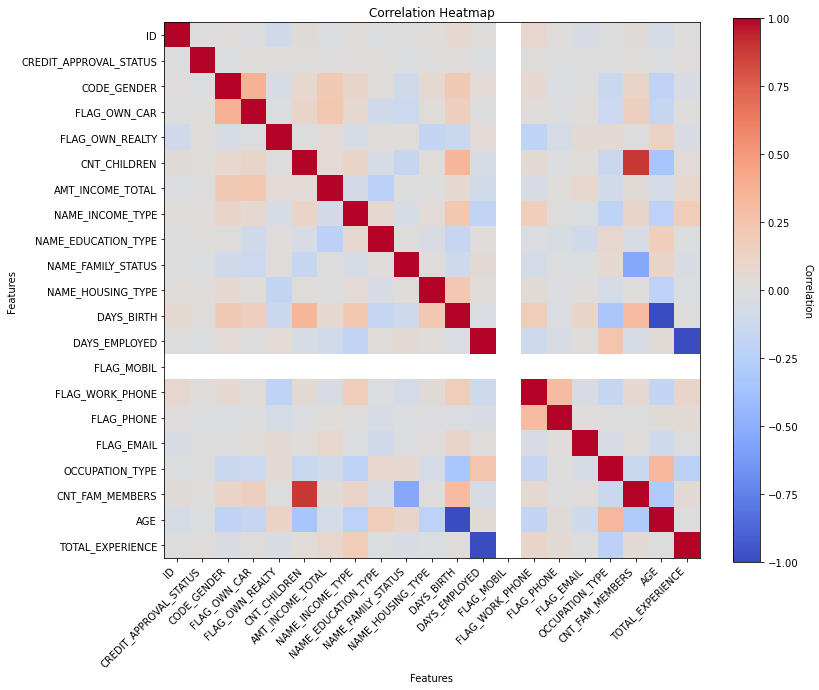

In [32]:

fig, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap
im = ax.imshow(merged_df.corr(), cmap='coolwarm', vmin=-1, vmax=1)

# Create a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the colorbar label
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")

# Set the title and axis labels
ax.set_title('Correlation Heatmap')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# Create tick labels for x and y axis
tick_labels = [col for col in merged_df.columns]
ax.set_xticks(np.arange(len(tick_labels)))
ax.set_yticks(np.arange(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=45, ha="right")
ax.set_yticklabels(tick_labels)

##### FLAG_MOBIL does not have any impact on the data so dropping that column

In [33]:
merged_df.drop(columns=['FLAG_MOBIL'],inplace=True)

Text(0.5, 1.0, 'Relationship between AMT_INCOME_TOTAL and CREDIT_APPROVAL_STATUS ')

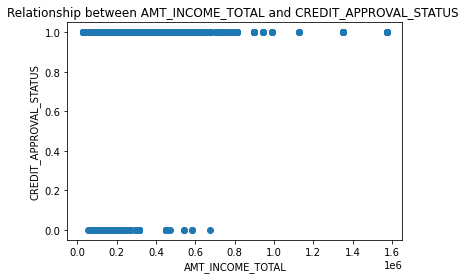

In [34]:
# AMT_INCOME_TOTAL and CREDIT_APPROVAL_STATUS 
plt.scatter(merged_df['AMT_INCOME_TOTAL'], merged_df['CREDIT_APPROVAL_STATUS'])

plt.xlabel('AMT_INCOME_TOTAL')

plt.ylabel('CREDIT_APPROVAL_STATUS')

plt.title('Relationship between AMT_INCOME_TOTAL and CREDIT_APPROVAL_STATUS ')

##### AMT_INCOME_TOTAL have impact on application approval status 

Text(0.5, 1.0, 'Relationship between CODE_GENDER and CREDIT_APPROVAL_STATUS ')

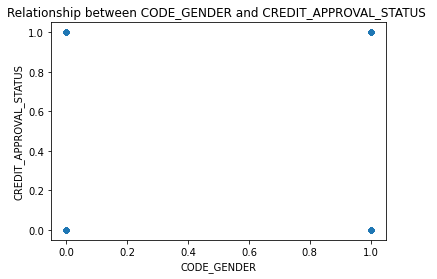

In [35]:
# CODE_GENDER and CREDIT_APPROVAL_STATUS 
merged_df.plot.scatter(x='CODE_GENDER', y='CREDIT_APPROVAL_STATUS')

plt.xlabel('CODE_GENDER')

plt.ylabel('CREDIT_APPROVAL_STATUS')

plt.title('Relationship between CODE_GENDER and CREDIT_APPROVAL_STATUS ')

##### CODE_GENDER does not much influence the approval status

### 4.Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x216d3b320d0>,
 'caps': [<matplotlib.lines.Line2D at 0x216d3b32730>,
 'boxes': [<matplotlib.lines.Line2D at 0x216d3b23dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x216d3b32c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x216d3b32f10>],
 'means': []}

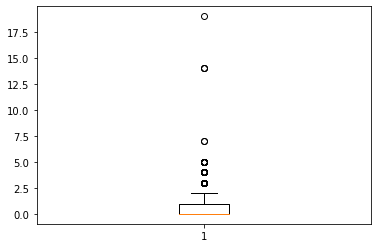

In [36]:
plt.boxplot(merged_df['CNT_CHILDREN'])

##### Removing the outliers from the cnt_children column

In [37]:
merged_df[merged_df['CNT_CHILDREN']>=17.5]

,ID,CREDIT_APPROVAL_STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,TOTAL_EXPERIENCE
24753,5105054,1.0,0,0,1,19,112500.0,4,4,3,1,-11057,-1853,1,1,0,17,20.0,30,5


In [38]:
merged_df = merged_df[merged_df['CNT_CHILDREN']<17.5]

{'whiskers': [<matplotlib.lines.Line2D at 0x216d3b9d460>,
 'caps': [<matplotlib.lines.Line2D at 0x216d3b9da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x216d3b9d190>],
 'medians': [<matplotlib.lines.Line2D at 0x216d3b9dfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x216d3ba92b0>],
 'means': []}

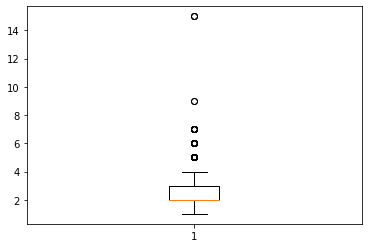

In [39]:
plt.boxplot(merged_df['CNT_FAM_MEMBERS'])

In [40]:
merged_df[merged_df['CNT_FAM_MEMBERS']>=12]

,ID,CREDIT_APPROVAL_STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,TOTAL_EXPERIENCE
14132,5061207,1.0,1,1,1,14,225000.0,4,4,2,1,-17754,-1689,0,0,0,4,15.0,48,4
14133,5061210,1.0,1,1,1,14,225000.0,4,4,2,1,-17754,-1689,0,0,0,4,15.0,48,4
14134,5061211,1.0,1,1,1,14,225000.0,4,4,2,1,-17754,-1689,0,0,0,4,15.0,48,4


In [41]:
merged_df = merged_df[merged_df['CNT_FAM_MEMBERS']<12]

### DATA CLEANING
### 10. reset index

In [42]:
merged_df = merged_df.reset_index()
merged_df.drop(columns = ['index'],inplace=True)

### EDA
### 5. Using bar chart to find distribution of categorical data

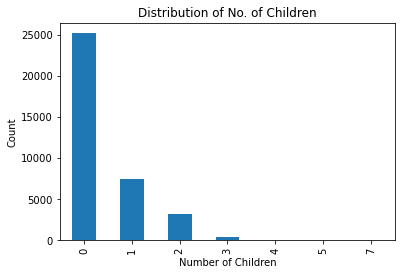

From the bar chart we have observed that there are compartively very less number of families with 3 or more children


In [43]:
children_counts = merged_df['CNT_CHILDREN'].value_counts()
children_counts.plot(kind='bar')

plt.title('Distribution of No. of Children')

plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.xticks(range(len(children_counts)), children_counts.index)

plt.show()
print("From the bar chart we have observed that there are compartively very less number of families with 3 or more children")

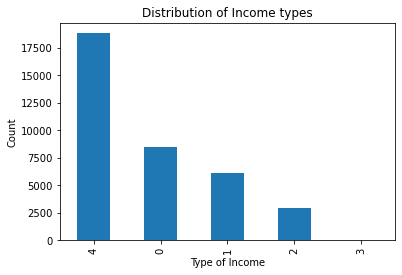

In [44]:
income_type_counts = merged_df['NAME_INCOME_TYPE'].value_counts()
income_type_counts.plot(kind='bar')

plt.title('Distribution of Income types')

plt.xlabel('Type of Income')
plt.ylabel('Count')

plt.xticks(range(len(income_type_counts)), income_type_counts.index)

plt.show()


### 6. Histogram to find the frequency of observations

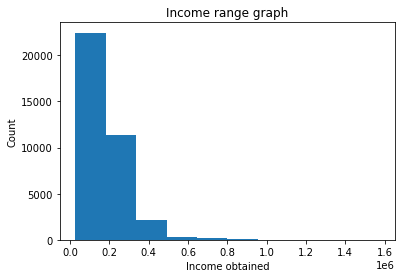

In [45]:
plt.hist(merged_df['AMT_INCOME_TOTAL'])
plt.title('Income range graph')
plt.xlabel('Income obtained')
plt.ylabel('Count')

plt.show()

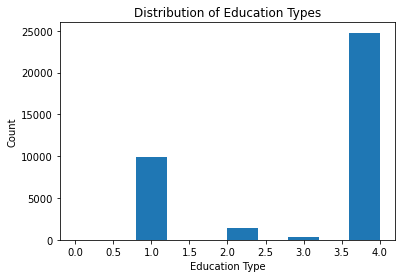

{'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}
Applicants have mostly completed their secondary school, also some applicants have even completed their higher education


In [46]:
plt.hist(merged_df['NAME_EDUCATION_TYPE'], bins=10)

plt.title('Distribution of Education Types')

plt.xlabel('Education Type')
plt.ylabel('Count')

plt.show()

print(NAME_EDUCATION_TYPE_CONVERSION)
print("Applicants have mostly completed their secondary school, also some applicants have even completed their higher education")

### 7. Using skew to find the skewness in the data

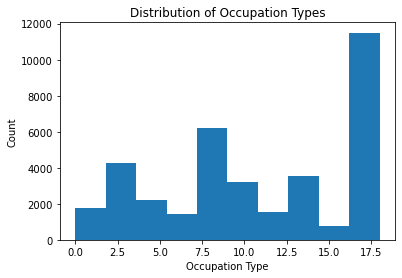

{'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17, 'No Job': 18} 

There are high varieties of Occupation types in our dataset


In [47]:
plt.hist(merged_df['OCCUPATION_TYPE'], bins=10)

plt.title('Distribution of Occupation Types')

plt.xlabel('Occupation Type')
plt.ylabel('Count')

plt.show()

print(OCCUPATION_TYPE_CONVERSION,"\n")
print("There are high varieties of Occupation types in our dataset")

In [48]:
occupation_skew = skew(merged_df['OCCUPATION_TYPE'])
print(occupation_skew)
print("The skewness value is negative for occupation type. \nThis indicates that the distribution of data is negatively skewed, with a long tail towards the left. This means that the majority of the data is concentrated towards the right side of the distribution")

-0.146216574987524
The skewness value is negative for occupation type. 
This indicates that the distribution of data is negatively skewed, with a long tail towards the left. This means that the majority of the data is concentrated towards the right side of the distribution


### 8. PIE Chart to find proportion of applicants

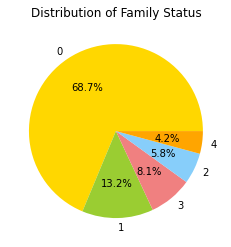

Around 70% of our applicatns are married


In [49]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']

plt.pie(merged_df['NAME_FAMILY_STATUS'].value_counts(), labels=merged_df['NAME_FAMILY_STATUS'].unique(), colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Family Status')
plt.show()
print("Around 70% of our applicatns are married")

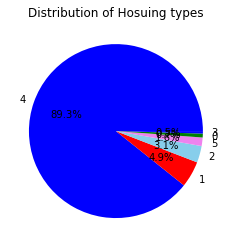

{'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
Around 90% of our applicatns are living in rented houses


In [50]:
colors = ['blue', 'red', 'skyblue', 'violet', 'green']

plt.pie(merged_df['NAME_HOUSING_TYPE'].value_counts(), labels=merged_df['NAME_HOUSING_TYPE'].unique(), colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Hosuing types')
plt.show()
print(NAME_HOUSING_TYPE_CONVERSION)
print("Around 90% of our applicatns are living in rented houses")

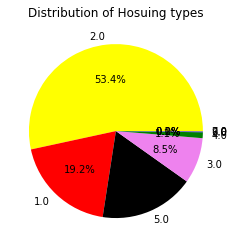

Around 54% of our applicatns are having 2 children


In [51]:
colors = ['Yellow', 'red', 'Black', 'violet', 'green','blue']

plt.pie(merged_df['CNT_FAM_MEMBERS'].value_counts(), labels=merged_df['CNT_FAM_MEMBERS'].unique(), colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Hosuing types')
plt.show()

print("Around 54% of our applicatns are having 2 children")

### 9. Line Graph to see the impact of one column on the other

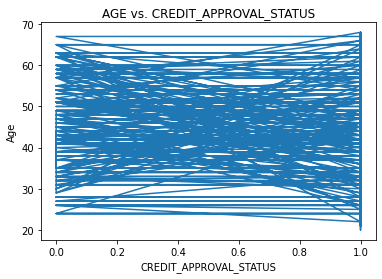

Approval is not that much impacted by age


In [52]:
x = merged_df['CREDIT_APPROVAL_STATUS']
y = merged_df['AGE']
plt.plot(x, y)

# Add title and labels
plt.title('AGE vs. CREDIT_APPROVAL_STATUS')
plt.xlabel('CREDIT_APPROVAL_STATUS')
plt.ylabel('Age')

plt.show()

print("Approval is not that much impacted by age")

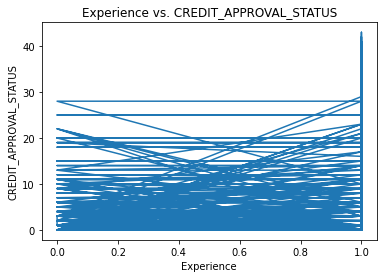

With increase in experience the approval had impact and people with more experience mostly got approval


In [53]:
x = merged_df['CREDIT_APPROVAL_STATUS']
y = merged_df['TOTAL_EXPERIENCE']
plt.plot(x, y)

# Add title and labels
plt.title('Experience vs. CREDIT_APPROVAL_STATUS')
plt.xlabel('Experience')
plt.ylabel('CREDIT_APPROVAL_STATUS')

plt.show()

print("With increase in experience the approval had impact and people with more experience mostly got approval")

### 10. Violin graph to visualize distribution of numerical data across various categories

{'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}

 
The applicants who have registered and not capable of completing higher have more salaries compared with other categories


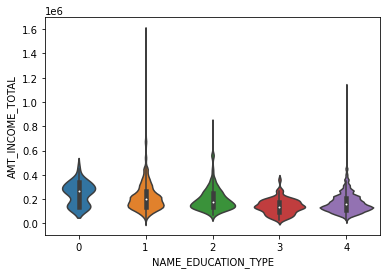

In [54]:
sns.violinplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=merged_df)

print(NAME_EDUCATION_TYPE_CONVERSION)
print("\n \nThe applicants who have registered and not capable of completing higher have more salaries compared with other categories")